In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Deep Learning/train_wind_mill.csv")

In [ ]:
dataset.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,16125.927107,36.116065,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,18689.732336,46.020045,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,114468.169007,34.572941,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


In [ ]:
dataset.shape

(28200, 22)

# Missing Values

In [ ]:
# Make the list of features which has missing values
features_with_na = [features for features in dataset.columns if dataset[features].isnull().sum() > 1]

In [ ]:
# step print the feature name and the percentage of missing values
for feature in features_with_na:
  print(feature, np.round(dataset[feature].isnull().mean(),4), " % missing values")

wind_speed(m/s) 0.0097  % missing values
atmospheric_temperature(°C) 0.1223  % missing values
shaft_temperature(°C) 0.0001  % missing values
blades_angle(°) 0.0077  % missing values
engine_temperature(°C) 0.0004  % missing values
motor_torque(N-m) 0.0009  % missing values
generator_temperature(°C) 0.0004  % missing values
atmospheric_pressure(Pascal) 0.096  % missing values
windmill_body_temperature(°C) 0.0838  % missing values
wind_direction(°) 0.181  % missing values
rotor_torque(N-m) 0.0203  % missing values
turbine_status 0.0624  % missing values
cloud_level 0.0098  % missing values
blade_length(m) 0.1806  % missing values
windmill_height(m) 0.0193  % missing values
windmill_generated_power(kW/h) 0.0073  % missing values


# Since they are many missing values, we need to find the relationship between  missing values and Power output

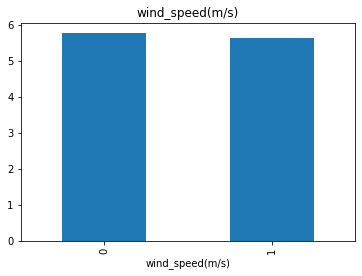

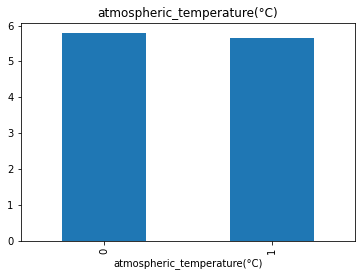

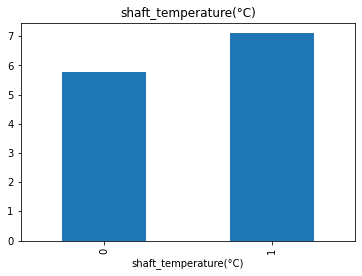

In [ ]:
for feature in features_with_na:
  data = dataset.copy()

  # let's make a variable that indicates 1 if the observation was missing or zero otherwise
  data[feature] = np.where(data[feature].isnull(), 1, 0)

  # let's calculate the mean SalePrice where the information is missing or present
  data.groupby(feature)["windmill_generated_power(kW/h)"].median().plot.bar()
  plt.title(feature)
  plt.show()

# Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these NaN values with something meaningful which we will do in the Feature Engineering section

In [ ]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != "O"]

print("Number of numerical variables: ", len(numerical_features))

# Visualise the numerical variables
dataset[numerical_features].head()

In [ ]:
# Temporal Variables(Eg: Datetime Variables)
# list of variables that contain datetime information
date_feature = [feature for feature in dataset.columns if "date" in feature]

date_feature

In [ ]:
# Lets analyze the Temporal Datetime Variables
# We will check whether there is a relation between datetime of the wind mill and the power output

#dataset.groupby("datetime")["datetime"].median().plot()
#plt.xlabel("datetime")
#plt.ylabel("Median power output")
#plt.title("datetime Vs Power output")

In [ ]:
# Numerical variables are usually of 2 type
# Continous variable and Discrete Variables
discrete_feature = [feature for feature in numerical_features if len(dataset[feature].unique()) < 25 and feature not in date_feature + ["tracking_id"]]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

In [ ]:
# Continuous Variable
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature + date_feature + ["tracking_id"]]
print("Continuous feature count {}".format(len(continuous_feature)))

# Replacing the Continuous Variable Missing Values

In [ ]:
for feature in continuous_feature:
    ## We will replace by using median since there are outliers
    median_value=dataset[feature].median()
    
    ## create a new feature to capture nan values
    dataset[feature].fillna(median_value,inplace=True)
    
dataset[continuous_feature].isnull().sum()

# check the categorical features

In [ ]:
# check the categorical features
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O'and feature not in date_feature + ["tracking_id"]]
print(categorical_features)

In [ ]:
# Check for unique values
dataset.turbine_status.unique()

In [ ]:
# Check for unique values
dataset.cloud_level.unique()

In [ ]:
most_frequent_category_cloud_level=dataset.cloud_level.mode()[0]
print(most_frequent_category_cloud_level)

In [ ]:
most_frequent_category_turbine_status=dataset.turbine_status.mode()[0]
print(most_frequent_category_turbine_status)

In [ ]:
# replace nan values with most occured category
dataset.cloud_level.fillna(most_frequent_category_cloud_level,inplace=True)
dataset.turbine_status.fillna(most_frequent_category_turbine_status,inplace=True)

In [ ]:
# check for remaining missing values in categorical variables
dataset[categorical_features].isnull().sum()

# One hot encoding for Categorical variables using Count of frequency method and target based ordinal Encoding 

In [ ]:
dataset.turbine_status.value_counts()

In [ ]:
# We replace the turbine status using ocured values of each category i.e Count of Frequency
# We start with converting values counts with dictionary
turbine_status_map = dataset.turbine_status.value_counts().to_dict()

In [ ]:
dataset.turbine_status = dataset.turbine_status.map(turbine_status_map)

In [ ]:
dataset.head()

In [ ]:
# Lest see another categorical vairiable cloud level
dataset.cloud_level.value_counts()

In [ ]:
# Lets implement the target based ordinal Encoding for this fetaure. It will assign integers to labels in the specific order that is observed in the data 
# and labels will have relation between them

In [ ]:
dataset.groupby(["cloud_level"])["windmill_generated_power(kW/h)"].mean()

In [ ]:
# Lets sort the values
dataset.groupby(["cloud_level"])["windmill_generated_power(kW/h)"].mean().sort_values()

In [ ]:
# Lets index it
dataset.groupby(["cloud_level"])["windmill_generated_power(kW/h)"].mean().index

In [ ]:
# Named it as ordinal label
ordinal_label_cloud = dataset.groupby(["cloud_level"])["windmill_generated_power(kW/h)"].mean().index

In [ ]:
# # Lets map these labels to dictionary
enumerate(ordinal_label_cloud, 0)

In [ ]:
# Lets map these labels to dictionary
ordinal_label_cloud_2 = {k:i for i,k in enumerate(ordinal_label_cloud, 0)}

In [ ]:
ordinal_label_cloud_2

In [ ]:
# Now lets map newly created ordinal dictionary to datset
dataset.cloud_level = dataset.cloud_level.map(ordinal_label_cloud_2)

In [ ]:
dataset.head()

# Lets analyse the continuous values by creating histograms to understand the distribution

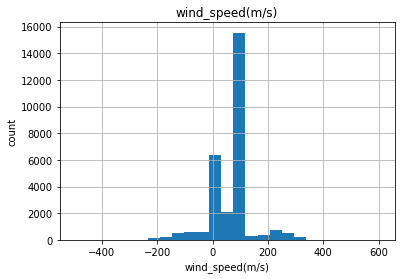

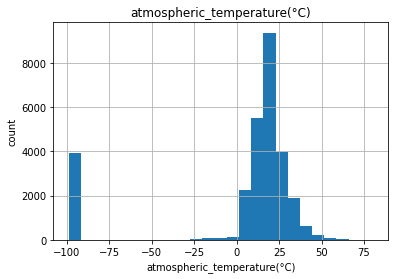

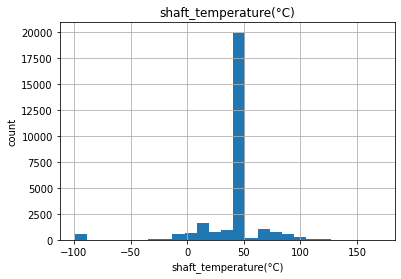

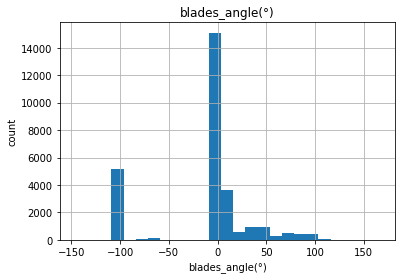

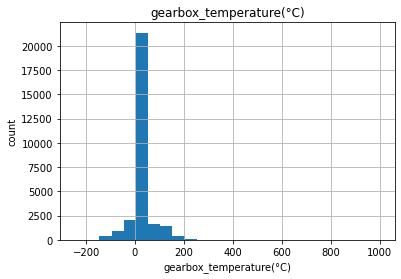

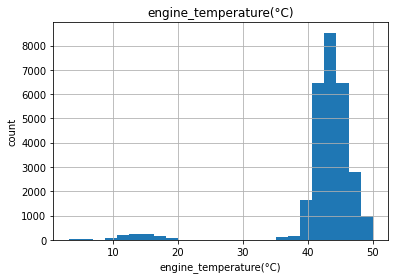

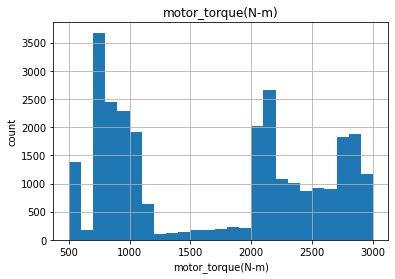

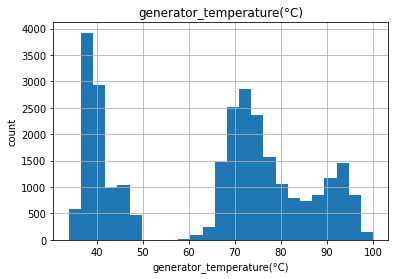

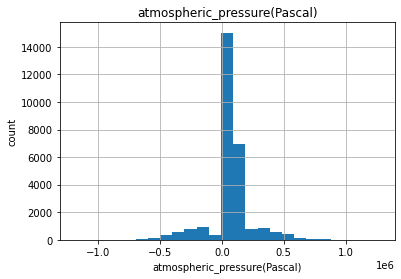

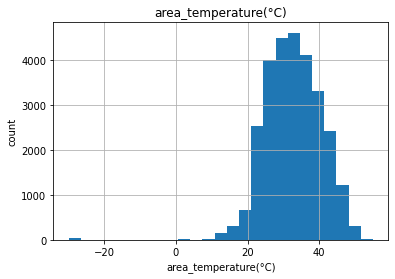

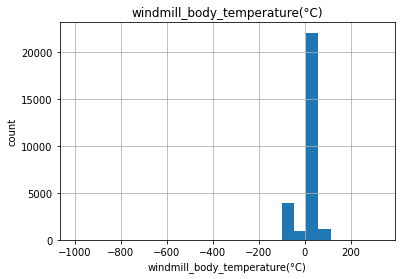

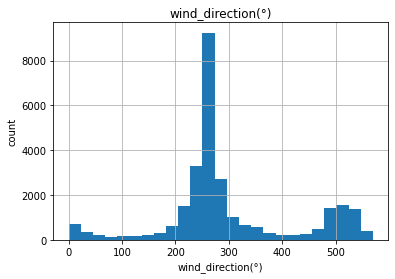

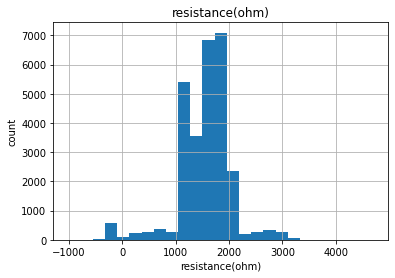

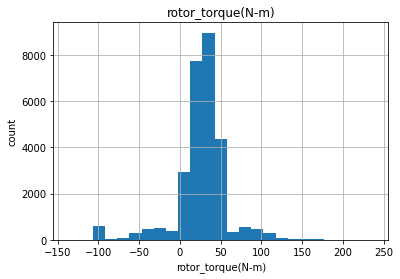

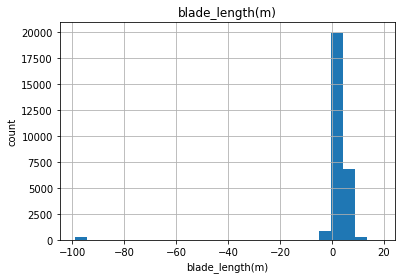

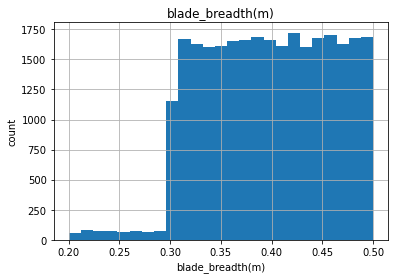

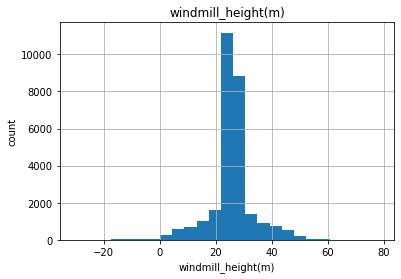

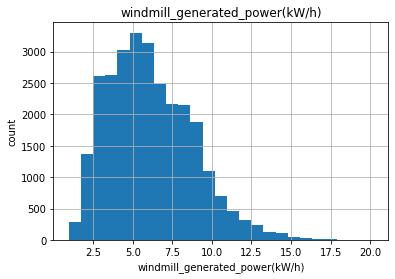

In [ ]:
# Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
  data = dataset.copy()
  data[feature].hist(bins = 25)
  plt.xlabel(feature)
  plt.ylabel("count")
  plt.title(feature)
  plt.show()

# Outliers

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


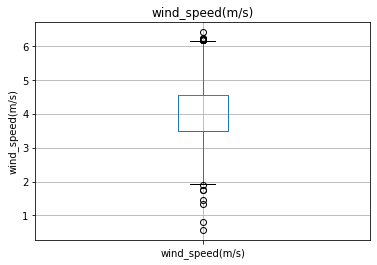

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


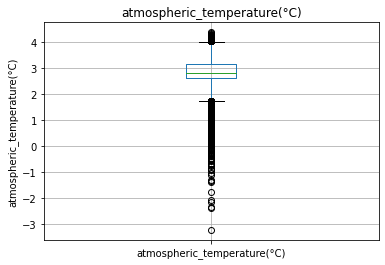

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


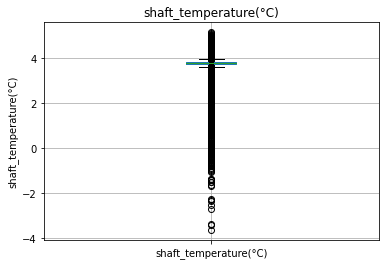

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


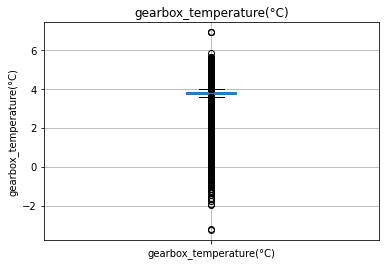

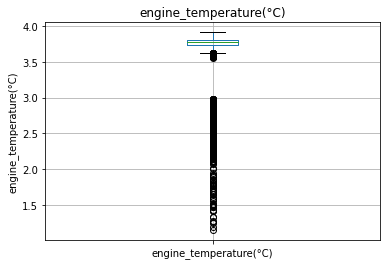

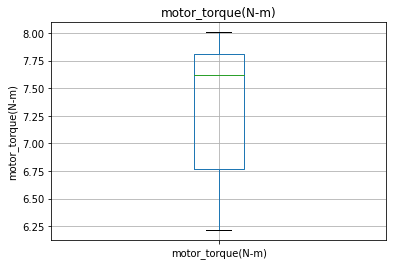

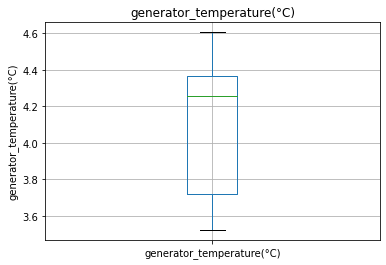

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


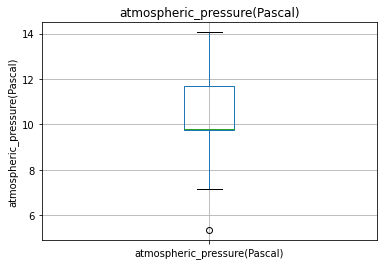

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


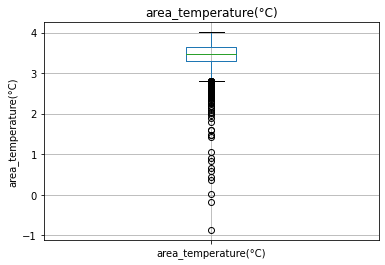

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


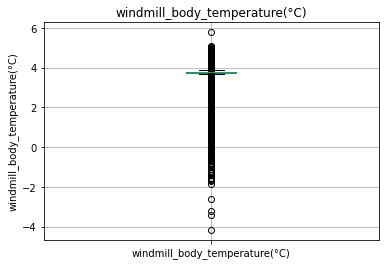

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


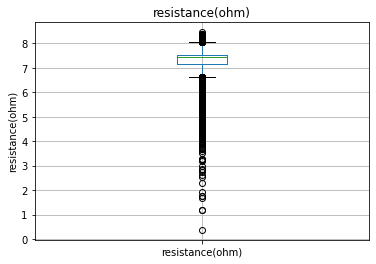

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


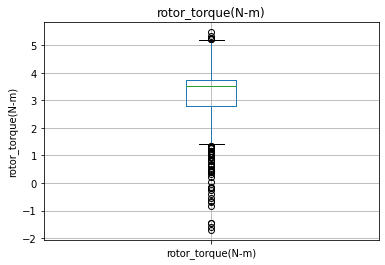

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


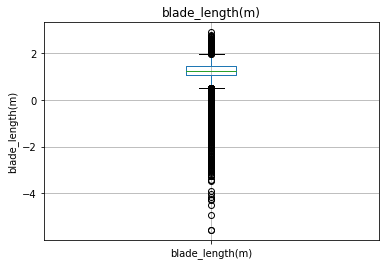

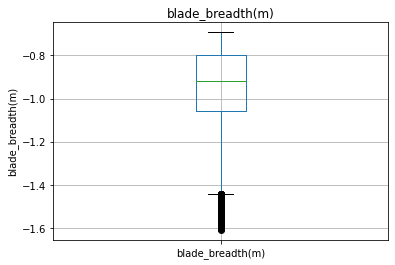

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


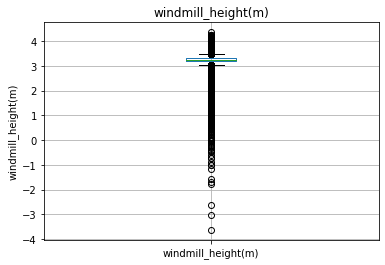

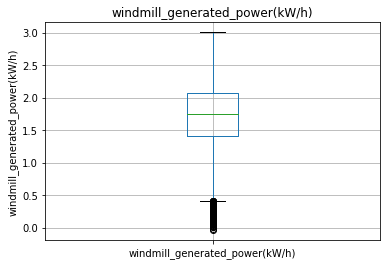

In [ ]:
for feature in continuous_feature:
  data = dataset.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature] = np.log(data[feature])
    data.boxplot(column= feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

# Check and correct the outliers in each continuous variable
# 1. Wind Speed

In [ ]:
# Check wind speed properties
dataset['wind_speed(m/s)'].describe()

count    28200.000000
mean        69.271978
std         75.942703
min       -496.211029
25%         21.250907
50%         93.302129
75%         95.248020
max        601.455670
Name: wind_speed(m/s), dtype: float64

Text(0, 0.5, 'Readings')

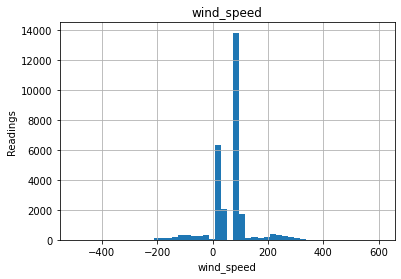

In [ ]:
# Lets check its disribution
figure=dataset['wind_speed(m/s)'].hist(bins=50)
figure.set_title('wind_speed')
figure.set_xlabel('wind_speed')
figure.set_ylabel('Readings')

In [ ]:
# Assuming wind speed follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers
uppper_boundary_wind_speed=dataset['wind_speed(m/s)'].mean() + 3* dataset['wind_speed(m/s)'].std()
lower_boundary_wind_speed=dataset['wind_speed(m/s)'].mean() - 3* dataset['wind_speed(m/s)'].std()
print(lower_boundary_wind_speed), print(uppper_boundary_wind_speed),print(dataset['wind_speed(m/s)'].mean())

-158.55613046704474
297.10008605941096
69.2719777961831


(None, None, None)

In [ ]:
# Remove the outliers from wind speed
dataset.loc[dataset['wind_speed(m/s)']<= 0,'wind_speed(m/s)']=0     # we are replacing negative values with 0 
dataset.loc[dataset['wind_speed(m/s)']>= 297,'wind_speed(m/s)']=297     # we are replacing values greater than 297 with 297

In [ ]:
# Check the wind speed column again
dataset["wind_speed(m/s)"].describe()

count    28200.000000
mean        76.189042
std         59.046594
min          0.000000
25%         21.250907
50%         93.302129
75%         95.248020
max        297.000000
Name: wind_speed(m/s), dtype: float64

# 2. Atmospheric_temperature(°C)

In [ ]:
dataset["atmospheric_temperature(°C)"].describe()

count    28200.000000
mean         2.306757
std         41.800134
min        -99.000000
25%          9.383737
50%         16.102410
75%         22.575311
max         80.217444
Name: atmospheric_temperature(°C), dtype: float64

Text(0, 0.5, 'Readings')

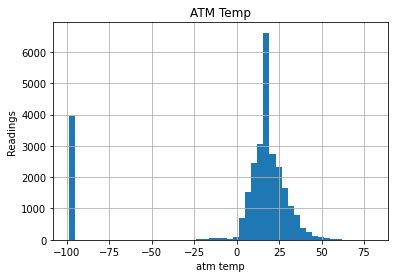

In [ ]:
# Lets check its disribution
figure=dataset["atmospheric_temperature(°C)"].hist(bins=50)
figure.set_title('ATM Temp')
figure.set_xlabel('atm temp')
figure.set_ylabel('Readings')

In [ ]:
# Assuming atmospheric_temperature follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers
uppper_boundary_atmospheric_temperature=dataset['atmospheric_temperature(°C)'].mean() + 3* dataset['atmospheric_temperature(°C)'].std()
lower_boundary_atmospheric_temperature=dataset['atmospheric_temperature(°C)'].mean() - 3* dataset['atmospheric_temperature(°C)'].std()
print(lower_boundary_atmospheric_temperature), print(uppper_boundary_atmospheric_temperature),print(dataset['atmospheric_temperature(°C)'].median())

-123.0936441581171
127.70715910122381
16.102410348693198


(None, None, None)

In [ ]:
# Lets compute the Interquantile range to calculate the boundaries assuming that distribution is not Gausian
IQR=dataset['atmospheric_temperature(°C)'].quantile(0.75)-dataset['atmospheric_temperature(°C)'].quantile(0.25)

In [ ]:
lower_bridge_atmospheric_temperature=dataset['atmospheric_temperature(°C)'].quantile(0.25)-(IQR*1.5)
upper_bridge_atmospheric_temperature=dataset['atmospheric_temperature(°C)'].quantile(0.75)+(IQR*1.5)
print(lower_bridge_atmospheric_temperature), print(upper_bridge_atmospheric_temperature)

-10.403624134189112
42.36267235832675


(None, None)

In [ ]:
# Remove the outliers from atmospheric_temperature
dataset.loc[dataset['atmospheric_temperature(°C)']<= -10,'atmospheric_temperature(°C)']=-10     # we are replacing negative values with -10 
dataset.loc[dataset['atmospheric_temperature(°C)']>= 42,'atmospheric_temperature(°C)']=42     # we are replacing values greater than 42 with 42

In [ ]:
dataset['atmospheric_temperature(°C)'].describe()

count    28200.000000
mean        14.673060
std         13.013793
min        -10.000000
25%          9.383737
50%         16.102410
75%         22.575311
max         42.000000
Name: atmospheric_temperature(°C), dtype: float64

# 3. shaft_temperature(°C)

In [ ]:
dataset["shaft_temperature(°C)"].describe()

count    28200.000000
mean        40.085642
std         27.203482
min        -99.000000
25%         41.633671
50%         43.686082
75%         45.673234
max        169.820455
Name: shaft_temperature(°C), dtype: float64

Text(0, 0.5, 'Readings')

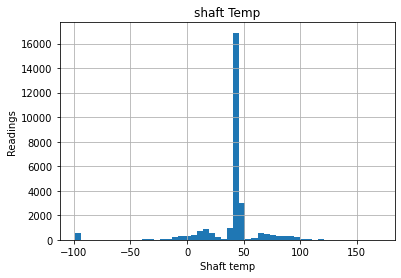

In [ ]:
# Lets check its disribution
figure=dataset["shaft_temperature(°C)"].hist(bins=50)
figure.set_title('shaft Temp')
figure.set_xlabel('Shaft temp')
figure.set_ylabel('Readings')

In [ ]:
# Assuming atmospheric_temperature follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers
uppper_boundary_shaft_temperature=dataset['shaft_temperature(°C)'].mean() + 3* dataset['shaft_temperature(°C)'].std()
lower_boundary_shaft_temperature=dataset['shaft_temperature(°C)'].mean() - 3* dataset['shaft_temperature(°C)'].std()
print(lower_boundary_shaft_temperature), print(uppper_boundary_shaft_temperature),print(dataset['shaft_temperature(°C)'].median())

-41.524802994063165
121.696087155715
43.68608192545875


(None, None, None)

In [ ]:
# Lets compute the Interquantile range to calculate the boundaries assuming that distribution is not Gausian
IQR_shaft_temperature=dataset['shaft_temperature(°C)'].quantile(0.75)-dataset['shaft_temperature(°C)'].quantile(0.25)

In [ ]:
lower_bridge_shaft_temperature=dataset['shaft_temperature(°C)'].quantile(0.25)-(IQR_shaft_temperature*1.5)
upper_bridge_shaft_temperature=dataset['shaft_temperature(°C)'].quantile(0.75)+(IQR_shaft_temperature*1.5)
print(lower_bridge_shaft_temperature), print(upper_bridge_shaft_temperature)

35.574325946599416
51.732578783826526


(None, None)

In [ ]:
# Lets remove the outliers using Gausian distribution assumption
dataset.loc[dataset['shaft_temperature(°C)']<= -41,'shaft_temperature(°C)']=-41     # we are replacing negative values with -41 
dataset.loc[dataset['shaft_temperature(°C)']>= 121,'shaft_temperature(°C)']=121     # we are replacing values greater than 121 with 121

In [ ]:
dataset["shaft_temperature(°C)"].describe()

count    28200.000000
mean        41.231281
std         21.891056
min        -41.000000
25%         41.633671
50%         43.686082
75%         45.673234
max        121.000000
Name: shaft_temperature(°C), dtype: float64

# 4.blades_angle(°)

In [ ]:
dataset["blades_angle(°)"].describe()

count    28200.000000
mean        -9.583888
std         47.740964
min       -146.259543
25%         -1.194486
50%         -0.495608
75%          5.370015
max        165.932123
Name: blades_angle(°), dtype: float64

Text(0, 0.5, 'Readings')

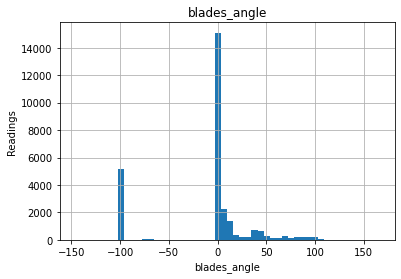

In [ ]:
# Lets check its disribution
figure=dataset["blades_angle(°)"].hist(bins=50)
figure.set_title('blades_angle')
figure.set_xlabel('blades_angle')
figure.set_ylabel('Readings')

In [ ]:
# Assuming atmospheric_temperature follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers
uppper_boundary_blades_angle=dataset['blades_angle(°)'].mean() + 3* dataset['blades_angle(°)'].std()
lower_boundary_blades_angle=dataset['blades_angle(°)'].mean() - 3* dataset['blades_angle(°)'].std()
print(uppper_boundary_blades_angle), print(lower_boundary_blades_angle),print(dataset['blades_angle(°)'].median())

133.63900237170958
-152.80677907981408
-0.4956079047522478


(None, None, None)

In [ ]:
# Lets compute the Interquantile range to calculate the boundaries assuming that distribution is not Gausian
IQR_blades_angle=dataset['blades_angle(°)'].quantile(0.75)-dataset['blades_angle(°)'].quantile(0.25)

In [ ]:
lower_bridge_blades_angle=dataset['blades_angle(°)'].quantile(0.25)-(IQR_blades_angle*1.5)
upper_bridge_blades_angle=dataset['blades_angle(°)'].quantile(0.75)+(IQR_blades_angle*1.5)
print(lower_bridge_blades_angle), print(upper_bridge_blades_angle)

-11.041238410339705
15.216766866842473


(None, None)

In [ ]:
# Lets remove the outliers using NON Gausian distribution assumption
dataset.loc[dataset['blades_angle(°)']<= -11,'blades_angle(°)']=-11     # we are replacing negative values with -11 
dataset.loc[dataset['blades_angle(°)']>= 15,'blades_angle(°)']=15     # we are replacing values greater than 15 with 15

In [ ]:
dataset["blades_angle(°)"].describe()

count    28200.000000
mean         1.082928
std          8.150333
min        -11.000000
25%         -1.194486
50%         -0.495608
75%          5.370015
max         15.000000
Name: blades_angle(°), dtype: float64

# 5. Gearbox_temperature(°C)

In [ ]:
dataset["gearbox_temperature(°C)"].describe()

count    28200.000000
mean        41.027833
std         43.662833
min       -244.974098
25%         40.557993
50%         43.221735
75%         45.879212
max        999.000000
Name: gearbox_temperature(°C), dtype: float64

Text(0, 0.5, 'Readings')

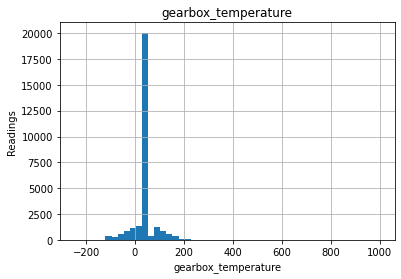

In [ ]:
# Lets check its disribution
figure=dataset["gearbox_temperature(°C)"].hist(bins=50)
figure.set_title('gearbox_temperature')
figure.set_xlabel('gearbox_temperature')
figure.set_ylabel('Readings')

In [ ]:
# Assuming atmospheric_temperature follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers
uppper_boundary_gearbox_temperature=dataset['gearbox_temperature(°C)'].mean() + 3* dataset['gearbox_temperature(°C)'].std()
lower_boundary_gearbox_temperature=dataset['gearbox_temperature(°C)'].mean() - 3* dataset['gearbox_temperature(°C)'].std()
print(uppper_boundary_gearbox_temperature), print(lower_boundary_gearbox_temperature),print(dataset['gearbox_temperature(°C)'].median())

172.01633239671153
-89.96066703358483
43.221734811954924


(None, None, None)

In [ ]:
# Lets compute the Interquantile range to calculate the boundaries assuming that distribution is not Gausian
IQR_gearbox_temperature=dataset['gearbox_temperature(°C)'].quantile(0.75)-dataset['gearbox_temperature(°C)'].quantile(0.25)

In [ ]:
lower_bridge_gearbox_temperature=dataset['gearbox_temperature(°C)'].quantile(0.25)-(IQR_gearbox_temperature*1.5)
upper_bridge_gearbox_temperature=dataset['gearbox_temperature(°C)'].quantile(0.75)+(IQR_gearbox_temperature*1.5)
print(lower_bridge_gearbox_temperature), print(upper_bridge_gearbox_temperature)

32.57616599615204
53.8610390461524


(None, None)

In [ ]:
# Lets remove the outliers using Gausian distribution assumption
dataset.loc[dataset['gearbox_temperature(°C)']<= -89,'gearbox_temperature(°C)']=-89     # we are replacing negative values with -89 
dataset.loc[dataset['gearbox_temperature(°C)']>= 172,'gearbox_temperature(°C)']=172     # we are replacing values greater than 15 with 15

In [ ]:
dataset["gearbox_temperature(°C)"].describe()

count    28200.000000
mean        41.023726
std         40.743007
min        -89.000000
25%         40.557993
50%         43.221735
75%         45.879212
max        172.000000
Name: gearbox_temperature(°C), dtype: float64

# Craeting functions for outliers

In [ ]:
# Create function for describe and see histogram
def des_see(feature):
  print(dataset[feature].describe())
  # Lets check its disribution histogram
  plot1 = plt.figure(1)
  figure1=dataset[feature].hist(bins=50)
  figure1.set_title(feature)
  figure1.set_xlabel(feature)
  figure1.set_ylabel('Readings1')
  # Lets check presence of outliers using box plot
  plot1 = plt.figure(2)
  figure2 = dataset.boxplot(column=feature)
  figure2.set_xlabel(feature)
  figure2.set_ylabel('Readings2')

In [ ]:
# Create function for calculating boundaries with Gaussian and non Gaussian distribution
def boundary_calculate(feature):
  # Gausian Boundary
  uppper_boundary_gaussian=dataset[feature].mean() + 3* dataset[feature].std()
  lower_boundary_gaussian=dataset[feature].mean() - 3* dataset[feature].std()
  print("Uppper_boundary_gaussian: {}".format(uppper_boundary_gaussian)), print("Lower_boundary_gaussian: {}".format(lower_boundary_gaussian)),print("Median: {}".format(dataset[feature].median()))
  # Non Gaussian Boundary
  IQR=dataset[feature].quantile(0.75)-dataset[feature].quantile(0.25)
  lower_bridge_non_gaussian=dataset[feature].quantile(0.25)-(IQR*1.5)
  upper_bridge_non_gaussian=dataset[feature].quantile(0.75)+(IQR*1.5)
  print("lower_bridge_non_gaussian: {}".format(lower_bridge_non_gaussian)), print("upper_bridge_non_gaussian: {}".format(upper_bridge_non_gaussian))

In [ ]:
# outlier removal function
def remove_outlier(feature, upper_bound, lower_bound):
  dataset.loc[dataset[feature]<= lower_bound,feature]=lower_bound     # we are replacing negative values with -89
  dataset.loc[dataset[feature]>= upper_bound,feature]=upper_bound     # we are replacing values greater than 15 with 15

# 6. engine_temperature(°C)

count    28200.000000
mean        42.614626
std          6.123271
min          3.167151
25%         41.911899
50%         43.525297
75%         45.173397
max         50.000000
Name: engine_temperature(°C), dtype: float64


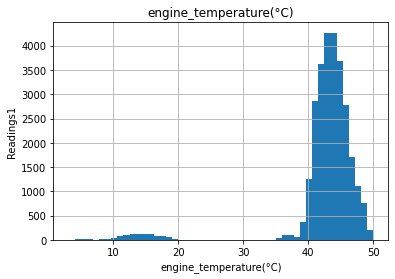

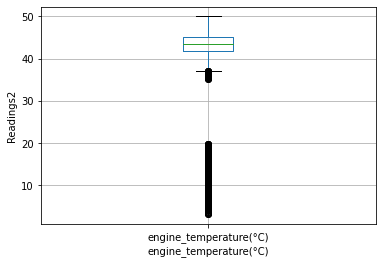

In [ ]:
des_see("engine_temperature(°C)")

In [ ]:
boundary_calculate("engine_temperature(°C)")

Uppper_boundary_gaussian: 60.98444025274458
Lower_boundary_gaussian: 24.244812241943865
Median: 43.52529653458639
lower_bridge_non_gaussian: 37.019651338099195
upper_bridge_non_gaussian: 50.06564504167888


In [ ]:
remove_outlier("engine_temperature(°C)", 37, 50)

# 7. Motor_torque(N-m)

count    28200.000000
mean      1711.093020
std        826.906441
min        500.000000
25%        870.621152
50%       2031.849540
75%       2462.164052
max       3000.000000
Name: motor_torque(N-m), dtype: float64


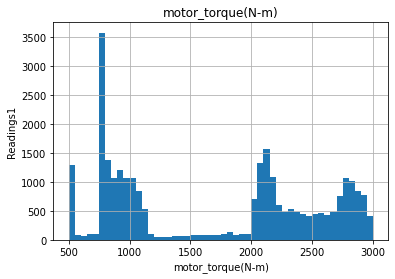

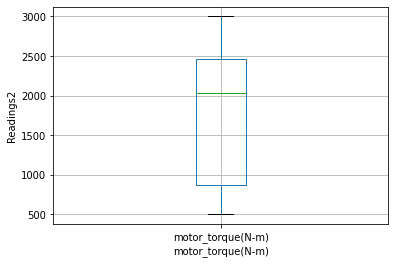

In [ ]:
des_see("motor_torque(N-m)")

In [ ]:
boundary_calculate("motor_torque(N-m)")

Uppper_boundary_gaussian: 4191.812342420412
Lower_boundary_gaussian: -769.6263027308134
Median: 2031.8495401356888
lower_bridge_non_gaussian: -1516.6931965601736
upper_bridge_non_gaussian: 4849.478400721549


In [ ]:
# No Need to perform outlier Treatment

# 8. Generator_temperature(°C)	

count    28200.000000
mean        65.030283
std         19.812632
min         33.893779
25%         41.200625
50%         70.729533
75%         78.939478
max        100.000000
Name: generator_temperature(°C), dtype: float64


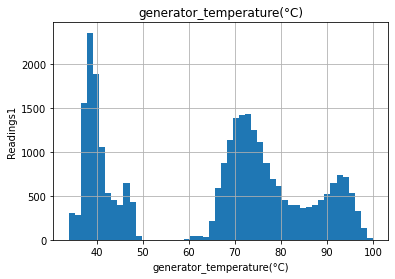

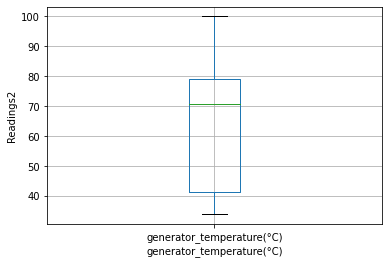

In [ ]:
des_see("generator_temperature(°C)")

In [ ]:
boundary_calculate("generator_temperature(°C)")

Uppper_boundary_gaussian: 124.46817806553251
Lower_boundary_gaussian: 5.59238847149696
Median: 70.72953276085299
lower_bridge_non_gaussian: -15.407655400235228
upper_bridge_non_gaussian: 135.54775870499424


In [ ]:
# No Need to perform outlier Treatment

# 9. Atmospheric_pressure(Pascal)

count    2.820000e+04
mean     4.982589e+04
std      1.785746e+05
min     -1.188624e+06
25%      1.689269e+04
50%      1.819113e+04
75%      1.164252e+05
max      1.272552e+06
Name: atmospheric_pressure(Pascal), dtype: float64


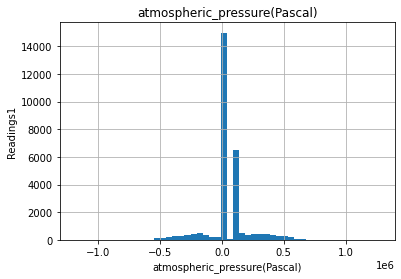

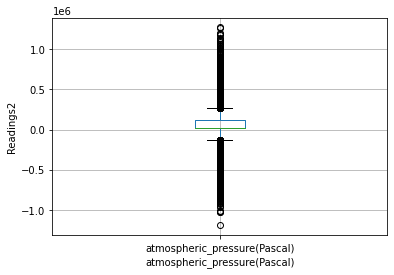

In [ ]:
des_see("atmospheric_pressure(Pascal)")

In [ ]:
boundary_calculate("atmospheric_pressure(Pascal)")

Uppper_boundary_gaussian: 585549.5936810591
Lower_boundary_gaussian: -485897.8038388383
Median: 18191.125867472405
lower_bridge_non_gaussian: -132406.04217387325
upper_bridge_non_gaussian: 265723.9091902612


In [ ]:
remove_outlier("atmospheric_pressure(Pascal)", 265723.9091902612, -132406.04217387325)

count     28200.000000
mean      52229.606961
std       99941.212189
min     -132406.042174
25%       16892.689588
50%       18191.125867
75%      116425.177429
max      265723.909190
Name: atmospheric_pressure(Pascal), dtype: float64


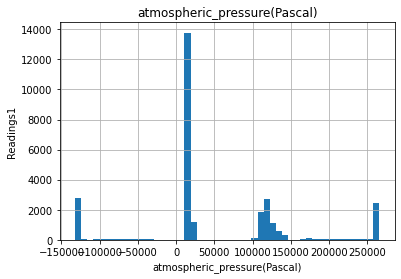

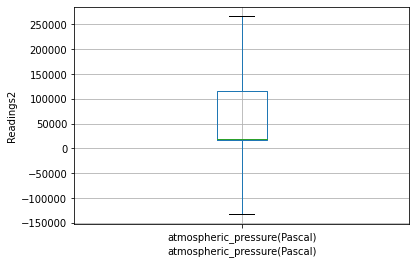

In [ ]:
des_see("atmospheric_pressure(Pascal)")

# 10. Area_temperature(°C)

count    28200.000000
mean        32.735091
std          7.703391
min        -30.000000
25%         27.311644
50%         32.605195
75%         38.232387
max         55.000000
Name: area_temperature(°C), dtype: float64


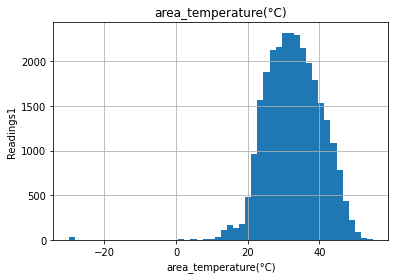

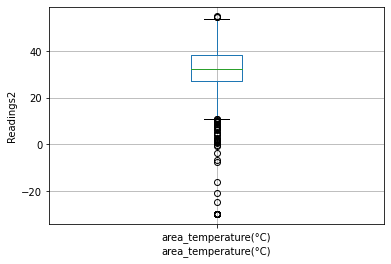

In [ ]:
des_see("area_temperature(°C)")

In [ ]:
boundary_calculate("area_temperature(°C)")

Uppper_boundary_gaussian: 55.845263881306124
Lower_boundary_gaussian: 9.624918122380521
Median: 32.605195010727044
lower_bridge_non_gaussian: 10.930529429986198
upper_bridge_non_gaussian: 54.61350110612318


In [ ]:
remove_outlier("area_temperature(°C)", 55.84, 9.62)

count    28200.000000
mean        32.788575
std          7.414860
min          9.620000
25%         27.311644
50%         32.605195
75%         38.232387
max         55.000000
Name: area_temperature(°C), dtype: float64


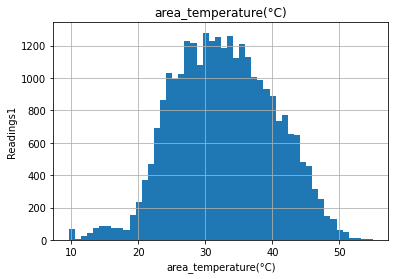

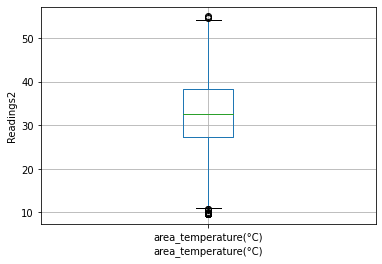

In [ ]:
des_see("area_temperature(°C)")

# 11. Windmill_body_temperature(°C)

count    28200.000000
mean        22.642152
std         52.384616
min       -999.000000
25%         40.851429
50%         42.786832
75%         44.325305
max        323.000000
Name: windmill_body_temperature(°C), dtype: float64


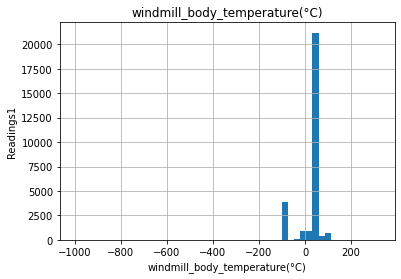

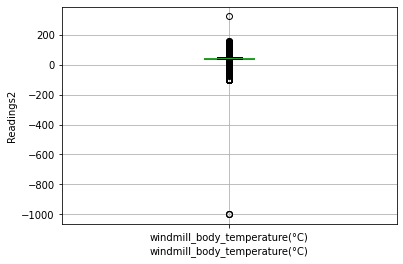

In [ ]:
des_see("windmill_body_temperature(°C)")

In [ ]:
boundary_calculate("windmill_body_temperature(°C)")

Uppper_boundary_gaussian: 179.79600134894878
Lower_boundary_gaussian: -134.5116965691371
Median: 42.786831821338346
lower_bridge_non_gaussian: 35.64061403579237
upper_bridge_non_gaussian: 49.536119277959074


In [ ]:
remove_outlier("windmill_body_temperature(°C)", 49.53, 35.64)

# 12. Wind_direction(°)

count    28200.000000
mean       300.471910
std        122.087135
min          0.000000
25%        246.793261
50%        271.427656
75%        332.325695
max        569.966479
Name: wind_direction(°), dtype: float64


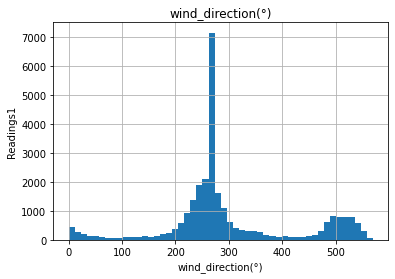

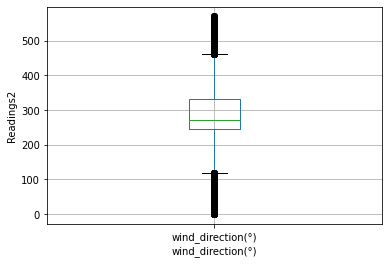

In [ ]:
des_see("wind_direction(°)")

In [ ]:
boundary_calculate("wind_direction(°)")

Uppper_boundary_gaussian: 666.7333136648213
Lower_boundary_gaussian: -65.78949406717658
Median: 271.4276555722353
lower_bridge_non_gaussian: 118.4946099997141
upper_bridge_non_gaussian: 460.6243462273946


In [ ]:
remove_outlier("wind_direction(°)", 460.62, 118.49)

# 13. Resistance(ohm)

count    28200.000000
mean      1575.563653
std        483.318211
min      -1005.222988
25%       1268.141402
50%       1678.238404
75%       1829.044723
max       4693.481933
Name: resistance(ohm), dtype: float64


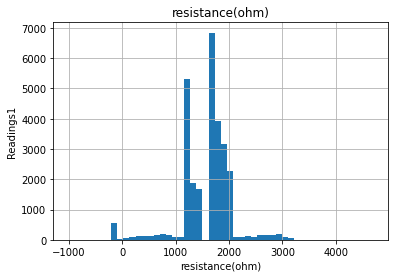

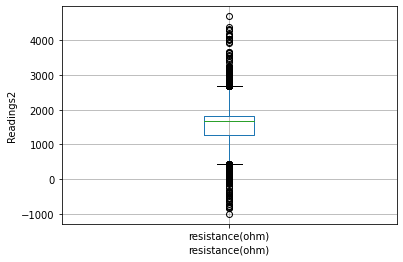

In [ ]:
des_see("resistance(ohm)")

In [ ]:
boundary_calculate("resistance(ohm)")

Uppper_boundary_gaussian: 3025.5182859522774
Lower_boundary_gaussian: 125.60901918916875
Median: 1678.2384041252815
lower_bridge_non_gaussian: 426.7864211250211
upper_bridge_non_gaussian: 2670.39970416561


In [ ]:
remove_outlier("resistance(ohm)", 3000, 0)  # We entered the manual upper and lower limits as less number of outliers are there

# 14. Rotor_torque(N-m)

count    28200.000000
mean        25.994462
std         32.109132
min       -136.732217
25%         13.829618
50%         32.977192
75%         41.337104
max        236.883264
Name: rotor_torque(N-m), dtype: float64


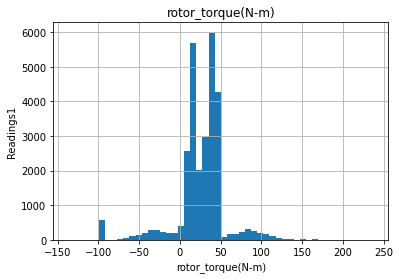

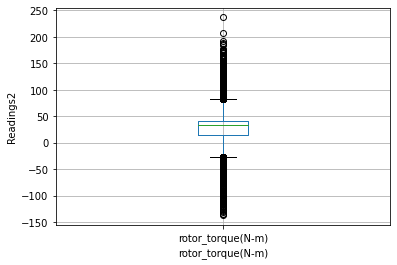

In [ ]:
des_see("rotor_torque(N-m)")

In [ ]:
boundary_calculate("rotor_torque(N-m)")

Uppper_boundary_gaussian: 122.32185739680257
Lower_boundary_gaussian: -70.33293352845475
Median: 32.97719178011148
lower_bridge_non_gaussian: -27.43161171875016
upper_bridge_non_gaussian: 82.59833362128175


In [ ]:
remove_outlier("rotor_torque(N-m)", 82.59, -27.43)

# 15. Blade_length(m)

count    28200.000000
mean         2.470631
std         10.217120
min        -99.000000
25%          2.735787
50%          3.453333
75%          4.156647
max         18.209800
Name: blade_length(m), dtype: float64


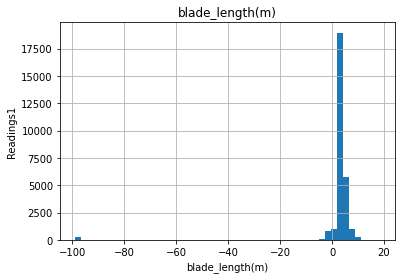

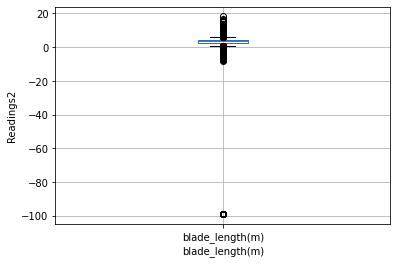

In [ ]:
des_see("blade_length(m)")

In [ ]:
boundary_calculate("blade_length(m)")

Uppper_boundary_gaussian: 33.1219916744668
Lower_boundary_gaussian: -28.180729515243815
Median: 3.453333243841766
lower_bridge_non_gaussian: 0.6044975602623652
upper_bridge_non_gaussian: 6.287936184958405


In [ ]:
remove_outlier("blade_length(m)", 6.28, 0)

# 16. Blade_breadth(m)

count    28200.000000
mean         0.397249
std          0.061158
min          0.200111
25%          0.347445
50%          0.398591
75%          0.449354
max          0.499975
Name: blade_breadth(m), dtype: float64


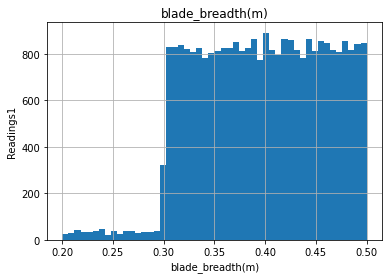

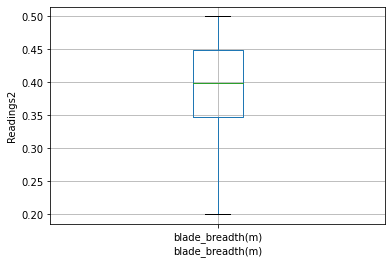

In [ ]:
des_see("blade_breadth(m)")

In [ ]:
# No outlier treament is needed

# 17. Windmill_height(m)

count    28200.000000
mean        25.888413
std          7.698407
min        -30.295253
25%         24.469380
50%         25.957739
75%         27.451080
max         78.351335
Name: windmill_height(m), dtype: float64


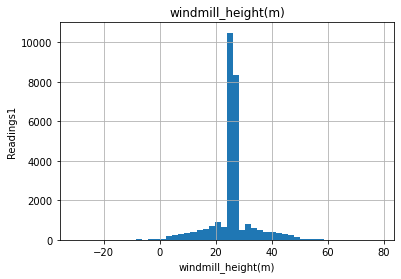

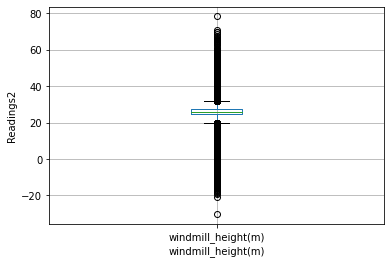

In [ ]:
des_see("windmill_height(m)")

In [ ]:
boundary_calculate("windmill_height(m)")

Uppper_boundary_gaussian: 48.98363413224912
Lower_boundary_gaussian: 2.7931922301140837
Median: 25.957739319560773
lower_bridge_non_gaussian: 19.996830051927322
upper_bridge_non_gaussian: 31.923629691256384


In [ ]:
remove_outlier("windmill_height(m)", 48.98, 2.79)

# Scalling the features

In [ ]:
dataset.head(2)

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-10.000000,41.723019,-0.903423,82.410573,37.0,2563.124522,76.665560,103402.961872,26.897875,42.786832,239.836388,2730.310605,42.084666,1854,2,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-41.000000,-11.000000,44.104919,37.0,2372.384119,78.129803,17030.904078,39.801469,42.786832,337.944723,1780.207200,82.590000,1855,2,4.210346,0.448494,27.262139,5.966275


In [ ]:
X = dataset.iloc[:, 2:21]
Y = dataset.iloc[:, 21]

In [ ]:
X.head(2)

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
0,94.820023,-10.000000,41.723019,-0.903423,82.410573,37.0,2563.124522,76.665560,103402.961872,26.897875,42.786832,239.836388,2730.310605,42.084666,1854,2,2.217542,0.314065,24.281689
1,241.832734,27.764785,-41.000000,-11.000000,44.104919,37.0,2372.384119,78.129803,17030.904078,39.801469,42.786832,337.944723,1780.207200,82.590000,1855,2,4.210346,0.448494,27.262139


In [ ]:
# Apply scaling using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X = scaler.fit_transform(X)

# Split into training and testing dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

# Start implementing the Machine learning algorithm

In [ ]:
# Implementing the Random Forest regressor
# Implementing the Gradient Boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
model_GradBoost = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls',
                          max_depth=10, max_features='auto',
                          max_leaf_nodes=None, min_impurity_decrease=0.0,
                          min_impurity_split=None, min_samples_leaf=6,
                          min_samples_split=4, min_weight_fraction_leaf=0.0,
                          n_estimators=900, n_iter_no_change=None,
                          presort='deprecated', random_state=None,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=1, warm_start=False)

In [ ]:
model_GradBoost.fit(x_train, y_train)

In [ ]:
model_GradBoost.score(x_train, y_train)

In [ ]:
model_GradBoost.score(x_test, y_test)

In [ ]:
import pickle
# save the model to disk
DATA_PATH = "/content/drive/MyDrive/Deep Learning/model_GradBoost.dat"
filename = 'model_GradBoost.dat'
pickle.dump(DATA_PATH, open(filename, 'wb'))